# From Conv. BackBone Transformer Result

In [185]:
import pandas as pd
from matplotlib import pyplot as plt

In [186]:
def calc_accuracy(df):
    return (df['true_label'] == df['predict_label']).sum() / len(df)

# Prediction Import

In [187]:
LABELS = ["Downstairs", "Jogging", "Sitting", "Standing", "Upstairs", "Walking"]
df = pd.read_csv('predict.csv', index_col=0)
predict = df.drop('true', axis=1)
true = df['true']
del df
true_encoded = true.map(lambda x: LABELS[x])
true_encoded.name = 'true_label'
predict.columns = LABELS
predict.head()

,Downstairs,Jogging,Sitting,Standing,Upstairs,Walking
0,2.667278,-6.223639,-10.455910,-7.705863,3.942457,5.992100
1,-3.501386,-5.147262,15.075128,7.256400,-0.475929,-2.861587
2,3.822823,-9.720933,-9.241361,-5.683146,6.891798,3.425873
3,3.279096,11.735168,-4.228587,-1.351361,-4.169562,-4.644408
4,-2.105618,-2.101908,0.199927,13.780579,-3.819936,-1.524870


In [188]:
# min-max normalization
predict = predict.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)
predict = predict.apply(lambda x: x / x.sum(), axis=1)

predict_label = predict.idxmax(axis=1)
predict_probability = predict.max(axis=1)
predict_probability.name = 'predict_probability'
predict_label.name = 'predict_label'
# predict.head()
# true.head()
# true_encoded.head()

In [189]:
df = pd.concat([
            predict,
            predict_probability,
            # true,
            predict_label,
            true_encoded
        ], axis=1)
df.head(10)

,Downstairs,Jogging,Sitting,Standing,Upstairs,Walking,predict_probability,predict_label,true_label
0,0.257560,0.083064,0.000000,0.053973,0.282588,0.322815,0.322815,Walking,Walking
1,0.039920,0.000000,0.490490,0.300848,0.113302,0.055439,0.490490,Sitting,Sitting
2,0.283220,0.000000,0.010029,0.084436,0.347397,0.274919,0.347397,Upstairs,Upstairs
3,0.278147,0.574988,0.014597,0.115599,0.016669,0.000000,0.574988,Jogging,Jogging
4,0.062686,0.062821,0.146990,0.643581,0.000000,0.083921,0.643581,Standing,Standing
5,0.146047,0.017134,0.000000,0.059657,0.227783,0.549379,0.549379,Walking,Walking
6,0.482250,0.025148,0.000000,0.070823,0.287404,0.134375,0.482250,Downstairs,Downstairs
7,0.357108,0.000000,0.079185,0.087397,0.224663,0.251647,0.357108,Downstairs,Downstairs
8,0.101614,0.594874,0.139825,0.063582,0.000000,0.100104,0.594874,Jogging,Jogging
9,0.223991,0.034359,0.000000,0.077907,0.165650,0.498093,0.498093,Walking,Walking


min:  0.25769197668536875
max:  0.9704506297273371


Text(0, 0.5, 'Count')

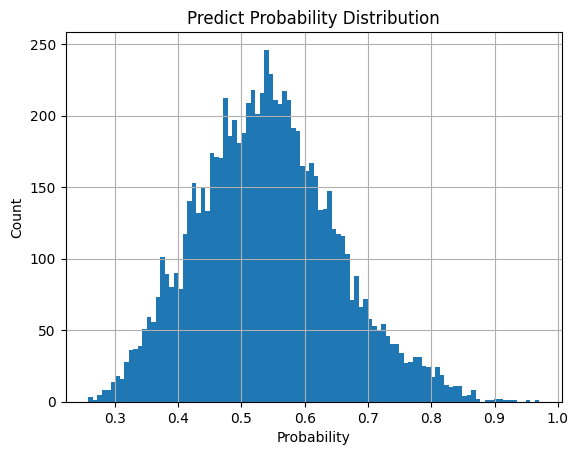

In [190]:
print("min: ", df['predict_probability'].min())
print("max: ", df['predict_probability'].max())
df['predict_probability'].hist(bins=100)
plt.title('Predict Probability Distribution')
plt.xlabel('Probability')
plt.ylabel('Count')

In [192]:

thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
for threshold in thresholds:
    print(f'threshold: {threshold}')
    print()
    df_confidence = df[df['predict_probability'] > threshold]
    df_drop = df.loc[list(set(df.index) - set(df_confidence.index)),:]
    print('original')
    print(f' length: {len(df)}')
    print(f' percentage: 100%')
    print(f' accuracy: {calc_accuracy(df) * 100}%')

    print('\n----------------------------------------\n')
    print('confidence')
    print(f' length: {len(df_confidence)}')
    print(f' percentage: {round(len(df_confidence) / len(df) * 100)}%')
    print(f' accuracy: {calc_accuracy(df_confidence) * 100}%')

    print('\n----------------------------------------\n')
    print('drop')
    print(f' length: {len(df_drop)}')
    print(f' percentage: {round(len(df_drop) / len(df) * 100)}%')
    print(f' accuracy: {calc_accuracy(df_drop) * 100}%')
    print('\n----------------------------------------')
    print('----------------------------------------\n')

threshold: 0.3

original
 length: 8237
 percentage: 100%
 accuracy: 95.20456476872647%

----------------------------------------

confidence
 length: 8199
 percentage: 100%
 accuracy: 95.38968166849617%

----------------------------------------

drop
 length: 38
 percentage: 0%
 accuracy: 55.26315789473685%

----------------------------------------
----------------------------------------

threshold: 0.4

original
 length: 8237
 percentage: 100%
 accuracy: 95.20456476872647%

----------------------------------------

confidence
 length: 7427
 percentage: 90%
 accuracy: 97.96687760872493%

----------------------------------------

drop
 length: 810
 percentage: 10%
 accuracy: 69.87654320987654%

----------------------------------------
----------------------------------------

threshold: 0.5

original
 length: 8237
 percentage: 100%
 accuracy: 95.20456476872647%

----------------------------------------

confidence
 length: 5232
 percentage: 64%
 accuracy: 99.36926605504587%

----------